This coursework makes use of the Infrared Thermography Temperature dataset, which contains thermal imaging measurements and oral temperatures collected from human volunteers in a clinical study with over one thousand participants. The data includes temperature readings taken from different locations on the face.

The study focused on evaluating how well infrared thermography devices perform, how different facial measurement locations affect temperature readings, and how these devices can be calibrated effectively.

My goal is to build a set of machine learning models that use the thermal imaging features and environmental information to predict a person's oral temperature.

I will predict two continuous targets: 
- The oral temperature measured in fast mode (aveOralF)
- The oral temperature measured in monitor mode (aveOralM)

I will also create binary classification labels to detect whether a person has a fever (defined as having an oral temperature of 37.5°C or above) for both aveOralF and aveOralM.
I can use these to predict two classification targets:
- Fever present in fast mode (aveOralF)
- Fever present in monitor mode (aveOralM)

These four prediction tasks will be trained, evaluated and compared using techniques covered in the module.


<h1?

In [2]:
assert __import__('ucimlrepo'), "Please install the 'ucimlrepo' package to proceed."

from ucimlrepo import fetch_ucirepo
# Load the dataset
data = fetch_ucirepo(id=925)

X = data.data.features
y = data.data.targets

X.head(), y.head()




(   Gender    Age                  Ethnicity  T_atm  Humidity  Distance  \
 0    Male  41-50                      White   24.0      28.0       0.8   
 1  Female  31-40  Black or African-American   24.0      26.0       0.8   
 2  Female  21-30                      White   24.0      26.0       0.8   
 3  Female  21-30  Black or African-American   24.0      27.0       0.8   
 4    Male  18-20                      White   24.0      27.0       0.8   
 
    T_offset1  Max1R13_1  Max1L13_1  aveAllR13_1  ...  T_FHCC1  T_FHRC1  \
 0     0.7025    35.0300    35.3775      34.4000  ...  33.5775  33.4775   
 1     0.7800    34.5500    34.5200      33.9300  ...  34.0325  34.0550   
 2     0.8625    35.6525    35.5175      34.2775  ...  34.9000  34.8275   
 3     0.9300    35.2225    35.6125      34.3850  ...  34.4400  34.4225   
 4     0.8950    35.5450    35.6650      34.9100  ...  35.0900  35.1600   
 
    T_FHLC1  T_FHBC1  T_FHTC1  T_FH_Max1  T_FHC_Max1   T_Max1    T_OR1  \
 0  33.3725  33.4925  

In [3]:
# Basic shape inspection
print("X shape:", X.shape)
print("y shape:", y.shape)

# Info about datatypes and null counts
print("\n--- X Info ---")
X.info()

print("\n--- y Info ---")
y.info()

# Summary statistics
print("\n--- X Describe ---")
display(X.describe(include='all'))

# Missing values
print("\n--- Missing Values in X ---")
print(X.isna().sum())

print("\n--- Missing Values in y ---")
print(y.isna().sum())



X shape: (1020, 33)
y shape: (1020, 2)

--- X Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       1020 non-null   object 
 1   Age          1020 non-null   object 
 2   Ethnicity    1020 non-null   object 
 3   T_atm        1020 non-null   float64
 4   Humidity     1020 non-null   float64
 5   Distance     1018 non-null   float64
 6   T_offset1    1020 non-null   float64
 7   Max1R13_1    1020 non-null   float64
 8   Max1L13_1    1020 non-null   float64
 9   aveAllR13_1  1020 non-null   float64
 10  aveAllL13_1  1020 non-null   float64
 11  T_RC1        1020 non-null   float64
 12  T_RC_Dry1    1020 non-null   float64
 13  T_RC_Wet1    1020 non-null   float64
 14  T_RC_Max1    1020 non-null   float64
 15  T_LC1        1020 non-null   float64
 16  T_LC_Dry1    1020 non-null   float64
 17  T_LC_Wet1    1020 non-null   float6

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
count,1020,1020,1020,1020.000000,1020.000000,1018.000000,1020.000000,1020.000000,1020.000000,1020.000000,...,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
unique,2,8,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Female,18-20,White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,606,534,506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,24.115392,28.723039,0.729784,0.968648,35.596533,35.611474,34.888475,...,34.573865,34.567782,34.565340,34.487701,34.577293,35.421555,35.094144,36.084785,35.805519,35.838277
std,NaN,NaN,NaN,1.336338,13.071627,2.456486,0.362587,0.574888,0.549760,0.718613,...,0.672461,0.669410,0.678663,0.668065,0.728678,0.523477,0.576045,0.491821,0.559258,0.559316
min,NaN,NaN,NaN,20.200000,9.900000,0.540000,-0.590000,33.897500,34.122500,31.770000,...,31.050000,31.452500,31.657500,31.280000,31.150000,33.407500,32.440000,34.892500,33.802500,33.835000
25%,NaN,NaN,NaN,23.400000,17.600000,0.600000,0.772500,35.247500,35.271875,34.456250,...,34.213125,34.180000,34.177500,34.096875,34.225000,35.116875,34.756458,35.775000,35.474375,35.500000
50%,NaN,NaN,NaN,24.000000,26.300000,0.620000,0.940000,35.548750,35.575000,34.915000,...,34.605000,34.597500,34.602500,34.512917,34.622500,35.391250,35.100000,36.027500,35.790000,35.825000
75%,NaN,NaN,NaN,24.700000,36.200000,0.700000,1.140000,35.872500,35.883125,35.300000,...,34.965625,34.968125,34.965000,34.878125,35.012500,35.675000,35.415000,36.280000,36.087500,36.120625



--- Missing Values in X ---
Gender         0
Age            0
Ethnicity      0
T_atm          0
Humidity       0
Distance       2
T_offset1      0
Max1R13_1      0
Max1L13_1      0
aveAllR13_1    0
aveAllL13_1    0
T_RC1          0
T_RC_Dry1      0
T_RC_Wet1      0
T_RC_Max1      0
T_LC1          0
T_LC_Dry1      0
T_LC_Wet1      0
T_LC_Max1      0
RCC1           0
LCC1           0
canthiMax1     0
canthi4Max1    0
T_FHCC1        0
T_FHRC1        0
T_FHLC1        0
T_FHBC1        0
T_FHTC1        0
T_FH_Max1      0
T_FHC_Max1     0
T_Max1         0
T_OR1          0
T_OR_Max1      0
dtype: int64

--- Missing Values in y ---
aveOralF    0
aveOralM    0
dtype: int64


Findings of initial inspection
We have 1020 unique entries, each with 33 features. We also have the correct amount of targets meaning this task will be completely supervised with nos missing target values.
There are three categorical collumns (`Gender`, `Age`, and `Ethnicity`) and all remaining features are numerical.
The only case of missing data in the feature set is the `Distance` collumn which has 2 missing entries. 

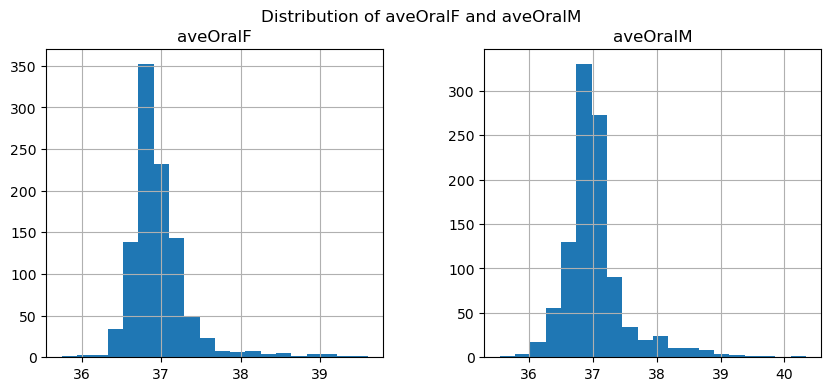

In [4]:
assert __import__('matplotlib'), "Please install the 'matplotlib' package to proceed."
import matplotlib.pyplot as plt

y.hist(bins=20, figsize=(10,4))
plt.suptitle("Distribution of aveOralF and aveOralM")
plt.show()


Both `aveOralF` and `aveOralM` display normal body temperatures (36.6–36.9°C), with some creeping over the normal average body temperature and few reaching over 37.5°C. With some more extreme examples reaching over 39°C (fast mode) and 40°C (monitor mode).

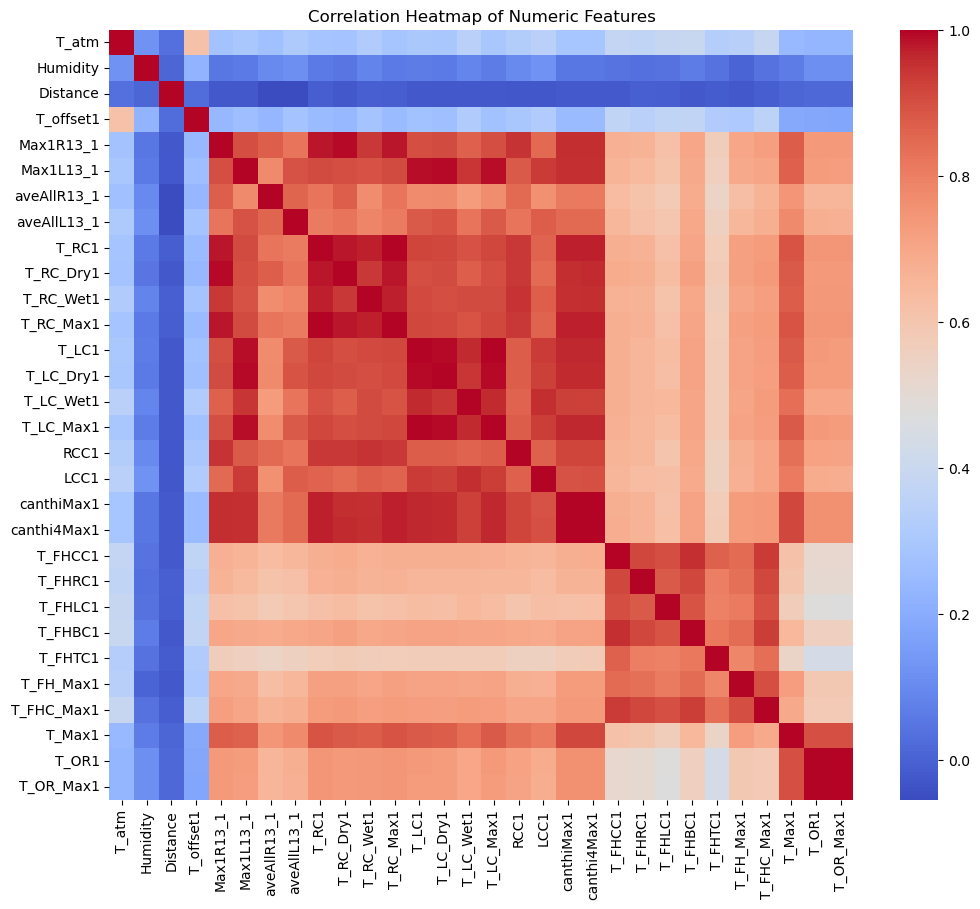

In [5]:
assert __import__('seaborn'), "Please install the 'seaborn' package to proceed."
import seaborn as sns

numeric_X = X.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12,10))
sns.heatmap(numeric_X.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


Correlation Analysis

A strong cluster of highly correlated features can be seen with the facial temperature measurements. This is expected as many of these values are captured from adjacent facial regions. In constrast, the more environmental factores, such as `T_atm`, `Humidity`, and `Distance` show very weak correlation with the rest of the dataset, meaning they may have a smaller influence on the prediction targets.

In [6]:
assert __import__('pandas'), "Please install the 'pandas' package to proceed."
import pandas as pd

numeric_X = X.select_dtypes(include=['float64', 'int64'])
corr_matrix = pd.concat([numeric_X, y], axis=1).corr()

# Top 5 for aveOralF (excluding the target itself)
top5_F = corr_matrix["aveOralF"].drop("aveOralF").sort_values(ascending=False).head(5)

# Top 5 for aveOralM (excluding the target itself)
top5_M = corr_matrix["aveOralM"].drop("aveOralM").sort_values(ascending=False).head(5)

print("Top 5 correlated features with aveOralF:")
display(top5_F.to_frame())

print("\nTop 5 correlated features with aveOralM:")
display(top5_M.to_frame())



Top 5 correlated features with aveOralF:


,aveOralF
aveOralM,0.884728
T_Max1,0.752546
T_OR1,0.718840
T_OR_Max1,0.718513
canthiMax1,0.673136



Top 5 correlated features with aveOralM:


,aveOralM
aveOralF,0.884728
T_Max1,0.849657
canthiMax1,0.784096
canthi4Max1,0.783763
T_RC_Max1,0.769463


Correlation with target values analysis
To get a better understanding of which facial thermal readings are most predictive, I examined the correlation between all numeric features and the two target variables. As expected they are heavily correlated with each other with a value of 0.884728, this makes sense as they are both measuring the exact same thing just with different methods.

For aveOralF, the strongest features were `T_Max1`, `T_OR1`, `T_OR_Max1`, and `canthiMax1`. 
For aveOralM, the strongest features were `T_Max1`, `canthiMax1`, `canthi4max1`, and `T_RC_Max1`.
These results make sense as they refer to usually warm facial regions such as around the eyes and the oral area.


In [7]:
assert __import__('sklearn'), "Please install the 'scikit-learn' package to proceed."
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Define the categorical features
categorical_features = ['Gender', 'Age', 'Ethnicity']
numerical_features = [col for col in X.columns if col not in categorical_features]

# Numeric preprocessing
# Fill in missing values with median and then scale all numeric features
# This is where we will fix the 2 missing values for 'Distance'
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical preprocessing
# Fill in missing values with the most frequent value and then one-hot encode all categorical features
# Gender will become two binary columns, Age will become multiple binary columns for each age group, etc.
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [8]:
from sklearn.compose import ColumnTransformer

# Create the full preprocessing pipeline that we can now use to transform our data for training/validation/testing
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features)
])



In [9]:
from sklearn.model_selection import train_test_split

# Split for aveOralF regression
X_train_F, X_test_F, y_train_F, y_test_F = train_test_split(
    X, y['aveOralF'], test_size=0.2, random_state=42
)

# Split for aveOralM regression
X_train_M, X_test_M, y_train_M, y_test_M = train_test_split(
    X, y['aveOralM'], test_size=0.2, random_state=42
)


In [10]:
# Fit the preprocessor on the training data and transform it
preprocessor.fit(X_train_F)
Xt = preprocessor.transform(X_train_F)
Xt.shape


(816, 46)

In [11]:
assert __import__('numpy'), "Please install the 'numpy' package to proceed."
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Create the full pipeline including the preprocessor and the model
linreg_pipeline_F = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Train the model for aveOralF
linreg_pipeline_F.fit(X_train_F, y_train_F)

# Make predictions on the test set for aveOralF
y_pred_F = linreg_pipeline_F.predict(X_test_F)

# Evaluate the model for aveOralF
rmse_F = np.sqrt(mean_squared_error(y_test_F, y_pred_F))
r2_F = r2_score(y_test_F, y_pred_F)


linreg_pipeline_M = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Train the model for aveOralM
linreg_pipeline_M.fit(X_train_M, y_train_M)
# Make predictions on the test set for aveOralM
y_pred_M = linreg_pipeline_M.predict(X_test_M)

# Evaluate the model for aveOralM
rmse_M = np.sqrt(mean_squared_error(y_test_M, y_pred_M))
r2_M = r2_score(y_test_M, y_pred_M)

rmse_F, r2_F, rmse_M, r2_M

(np.float64(0.23926376815093578),
 0.524320370176939,
 np.float64(0.2324823366156547),
 0.7433276883751387)

In [16]:
from sklearn.ensemble import RandomForestRegressor
# Create the full pipeline including the preprocessor and the model

rf_pipeline_F = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=200, random_state=42))
])

rf_pipeline_F.fit(X_train_F, y_train_F)
y_pred_rf_F = rf_pipeline_F.predict(X_test_F)

rmse_rf_F = np.sqrt(mean_squared_error(y_test_F, y_pred_rf_F))
r2_rf_F = r2_score(y_test_F, y_pred_rf_F)

rf_pipeline_M = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=200, random_state=42))
])

rf_pipeline_M.fit(X_train_M, y_train_M)
y_pred_rf_M = rf_pipeline_M.predict(X_test_M)

rmse_rf_M = np.sqrt(mean_squared_error(y_test_M, y_pred_rf_M))
r2_rf_M = r2_score(y_test_M, y_pred_rf_M)

rmse_rf_F, r2_rf_F, rmse_rf_M, r2_rf_M

(np.float64(0.23251030047813137),
 0.5507944923610983,
 np.float64(0.2383699533946565),
 0.73016261392853)

In [13]:
from sklearn.neural_network import MLPRegressor

# Create the full pipeline including the preprocessor and the model
mlp_pipeline_F = Pipeline([
    ('preprocessor', preprocessor),
    ('model', MLPRegressor(hidden_layer_sizes=(50,50), max_iter=500, random_state=42))
])

mlp_pipeline_F.fit(X_train_F, y_train_F)
y_pred_mlp_F = mlp_pipeline_F.predict(X_test_F)

rmse_mlp_F = np.sqrt(mean_squared_error(y_test_F, y_pred_mlp_F))
r2_mlp_F = r2_score(y_test_F, y_pred_mlp_F)

mlp_pipeline_M = Pipeline([
    ('preprocessor', preprocessor),
    ('model', MLPRegressor(hidden_layer_sizes=(50,50), max_iter=500, random_state=42))
])

mlp_pipeline_M.fit(X_train_M, y_train_M)
y_pred_mlp_M = mlp_pipeline_M.predict(X_test_M)

rmse_mlp_M = np.sqrt(mean_squared_error(y_test_M, y_pred_mlp_M))
r2_mlp_M = r2_score(y_test_M, y_pred_mlp_M)

rmse_mlp_F, r2_mlp_F, rmse_mlp_M, r2_mlp_M

(np.float64(0.5646311428924753),
 -1.6490510922366846,
 np.float64(0.5852200750024611),
 -0.6264380613307563)

### Linear Regression Model
**aveOralF** RMSE=0.24°C, R²=0.52

**aveOralM** RMSE=0.23°C, R²=0.74

### Random Forest Model
**aveOralF** RMSE=0.23°C, R² 0.55

**aveOralM** RMSE=0.24°C, R² 0.73

### Neural Network Model
**aveOralF** RMSE 0.56°C, R²=-1.65

**aveOralM** RMSE=0.59°C, R²=-0.63

The model that performed best for aveOralF was Random Forest, and the best for aveOralM was Linear Regression. The neural network model performed extremely poorly on both.

The reason that the Random Forest model probably performed better regarding aveOralF was due to the dataset looking a little noisier (more outliers sitting at higher temperatures) compared to aveOralM. Conversely, the dataset for aveOralM was less noisy and more stable, with instances of higher temperatures showing a gradual decline and appearing less sporadic than aveOralF. For this reason, the Linear Regression model worked better. The neural network model performing so poorly can boil down to the smaller scale of the dataset and the fact that neural networks are more prone to overfitting.